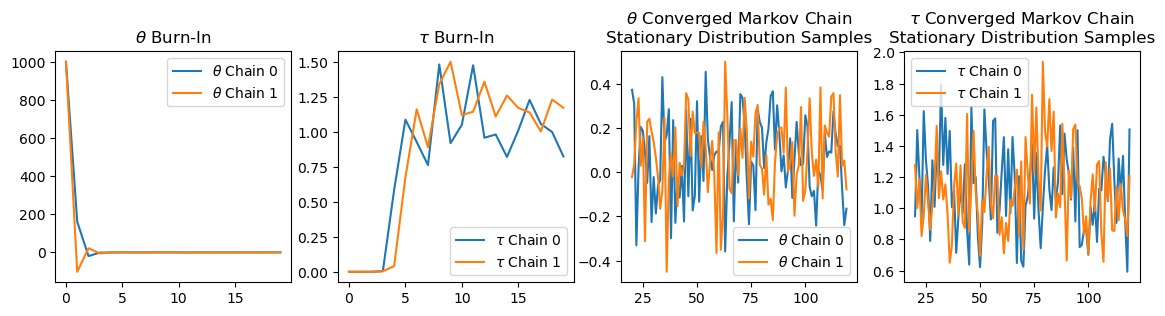

95% Credible Interval for θ: [-0.2853017   0.41959468]
Posterior Mean for θ: 0.06789341073427099
Posterior Standard Deviation for θ: 0.17945951583014513


In [2]:
#Q1
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt

# Parameters
n = 30
x = norm(loc=0, scale=1).rvs(size=n)
C, G = 2, 10000  # Chains and Gibbs samples

# Initialize
theta = np.zeros([C, G])
tau = np.zeros([C, G])
theta[:, 0] = 1000  # Initialization

# Hyperparameters for priors
alpha = 2
lambda_param = 1

# Gibbs Sampling
for c in range(C):
    for g in range(1, G):
        # Sampling tau | theta, x (Gamma distribution)
        alpha_post = alpha + n / 2
        lambda_post = lambda_param + 0.5 * np.sum((x - theta[c, g - 1])**2)
        tau[c, g] = gamma.rvs(a=alpha_post, scale=1 / lambda_post)

        # Sampling theta | tau, x (Normal distribution)
        tau_theta = n * tau[c, g]
        mean_theta = np.sum(x) * tau[c, g] / tau_theta
        theta[c, g] = norm.rvs(loc=mean_theta, scale=1 / np.sqrt(tau_theta))

# Plot Burn-In and Stationary Samples
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title(r"$\theta$ Burn-In")
ax[1].set_title(r"$\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120

for c in range(C):
    ax[0].plot(theta[c, :burn], label=r"$\theta$ Chain " + str(c))
    ax[1].plot(tau[c, :burn], label=r"$\tau$ Chain " + str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label=r"$\theta$ Chain " + str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label=r"$\tau$ Chain " + str(c))

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

# Results
burn_in = 200
theta_samples = theta[:, burn_in:].flatten()
credible_interval_theta = np.percentile(theta_samples, [2.5, 97.5])
posterior_mean_theta = np.mean(theta_samples)
posterior_std_theta = np.std(theta_samples)

print("95% Credible Interval for θ:", credible_interval_theta)
print("Posterior Mean for θ:", posterior_mean_theta)
print("Posterior Standard Deviation for θ:", posterior_std_theta)


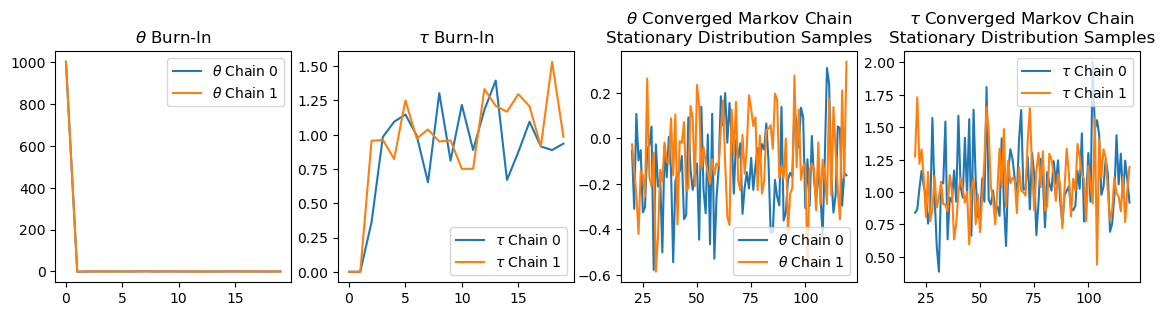

95% Credible Interval for θ: [-0.48990727  0.22960548]
Posterior Mean for θ: -0.1289272888822874
Posterior Standard Deviation for θ: 0.18144099717336332
95% Credible Interval for τ: [0.59986842 1.60766584]


In [1]:
#Q2
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt

# Parameters
n = 30
x = norm(loc=0, scale=1).rvs(size=n)
C, G = 2, 10000  # Chains and Gibbs samples

# Initialize
theta = np.zeros([C, G])
tau = np.zeros([C, G])
theta[:, 0] = 1000  # Initialization

# Hyperparameters for priors
theta_0 = 0
tau_0 = 1
alpha = 2
lambda_param = 1

# Gibbs Sampling
for c in range(C):
    for g in range(1, G):
        # Sampling tau | theta, x (Gamma distribution)
        alpha_post = alpha + n / 2
        lambda_post = lambda_param + 0.5 * np.sum((x - theta[c, g - 1])**2)
        tau[c, g] = gamma.rvs(a=alpha_post, scale=1 / lambda_post)

        # Sampling theta | tau, x (Normal distribution)
        tau_theta = n * tau[c, g] + tau_0
        mean_theta = (np.sum(x) * tau[c, g] + theta_0 * tau_0) / tau_theta
        theta[c, g] = norm.rvs(loc=mean_theta, scale=1 / np.sqrt(tau_theta))

# Plot Burn-In and Stationary Samples
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title(r"$\theta$ Burn-In")
ax[1].set_title(r"$\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120

for c in range(C):
    ax[0].plot(theta[c, :burn], label=r"$\theta$ Chain " + str(c))
    ax[1].plot(tau[c, :burn], label=r"$\tau$ Chain " + str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label=r"$\theta$ Chain " + str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label=r"$\tau$ Chain " + str(c))

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

# Results
burn_in = 200
theta_samples = theta[:, burn_in:].flatten()
tau_samples = tau[:, burn_in:].flatten()

credible_interval_theta = np.percentile(theta_samples, [2.5, 97.5])
credible_interval_tau = np.percentile(tau_samples, [2.5, 97.5])
posterior_mean_theta = np.mean(theta_samples)
posterior_std_theta = np.std(theta_samples)

print("95% Credible Interval for θ:", credible_interval_theta)
print("Posterior Mean for θ:", posterior_mean_theta)
print("Posterior Standard Deviation for θ:", posterior_std_theta)
print("95% Credible Interval for τ:", credible_interval_tau)




#Q3
### Multinomial-Dirichlet Model Posterior Derivation

#### Problem Background
1. **Observed Data:**
   Observing $\mathbf{x} = (x_1, x_2, \ldots, x_K)$, which follows $\text{Multinomial}(n, \boldsymbol{\theta})$, where $n$ is the total number of trials, and $\boldsymbol{\theta} = (\theta_1, \theta_2, \ldots, \theta_K)$ represents the probabilities for each category.

2. **Prior Distribution:**
   $\boldsymbol{\theta} \sim \text{Dirichlet}(\alpha_1, \alpha_2, \ldots, \alpha_K)$, where $\alpha_k > 0$ are the prior parameters.

---

#### Posterior Derivation
By Bayes' theorem:
$$
p(\boldsymbol{\theta} | \mathbf{x}) \propto p(\mathbf{x} | \boldsymbol{\theta}) p(\boldsymbol{\theta}),
$$
combining the likelihood and the prior:

1. **Likelihood Function:**
   $$
   p(\mathbf{x} | \boldsymbol{\theta}) = \frac{n!}{x_1! x_2! \cdots x_K!} \prod_{k=1}^K \theta_k^{x_k}.
   $$

2. **Prior Distribution:**
   $$
   p(\boldsymbol{\theta}) = \frac{1}{B(\boldsymbol{\alpha})} \prod_{k=1}^K \theta_k^{\alpha_k - 1},
   $$
   where $B(\boldsymbol{\alpha})$ is the normalization constant.

3. **Posterior Distribution:**
   $$
   p(\boldsymbol{\theta} | \mathbf{x}) \propto \prod_{k=1}^K \theta_k^{x_k + \alpha_k - 1},
   $$
   which leads to
   $$
   \boldsymbol{\theta} | \mathbf{x} \sim \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \ldots, \alpha_K + x_K).
   $$

---

#### Conclusion
1. **Posterior Update Rule:**
   Each category's count $x_k$ is added to the corresponding prior parameter $\alpha_k$.

2. **Final Answer:**
   $$
   \boldsymbol{\theta} | \mathbf{x} \sim \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \ldots, \alpha_K + x_K).
   $$
